 **PIMA Indian Diabetes dataset**
 
 The PIMA Indian Diabetes dataset contains medical data from a population of Pima Indians, focusing on predicting the onset of diabetes 
 based on factors such as age, BMI, blood pressure, insulin levels, and glucose concentration. 
 The dataset includes 768 observations, with 8 features and a target variable indicating diabetes diagnosis (positive or negative).

 It is highly relevant for building prediction models as it provides a real-world scenario for binary classification, 
 allowing machine learning algorithms to predict diabetes based on health indicators, which can help in early diagnosis and intervention.

In [1]:
import numpy as np
import random
import os
import sys
import matplotlib.pyplot as  plt
import pandas as pd
from pandas import read_table, read_csv
import seaborn as sns

In [2]:
# read the csv table using Pandas
pima = read_csv("diabetes.csv", sep=",")
type(pima)

pandas.core.frame.DataFrame

In [3]:
# name of the columns
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# quick description of the data
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# for the outcome verify the number of classes
pima["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
# Summary of the numerical attributes
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# look at a specific attribute
pima.describe()["BMI"]

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [8]:
pima.describe()["Age"]

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

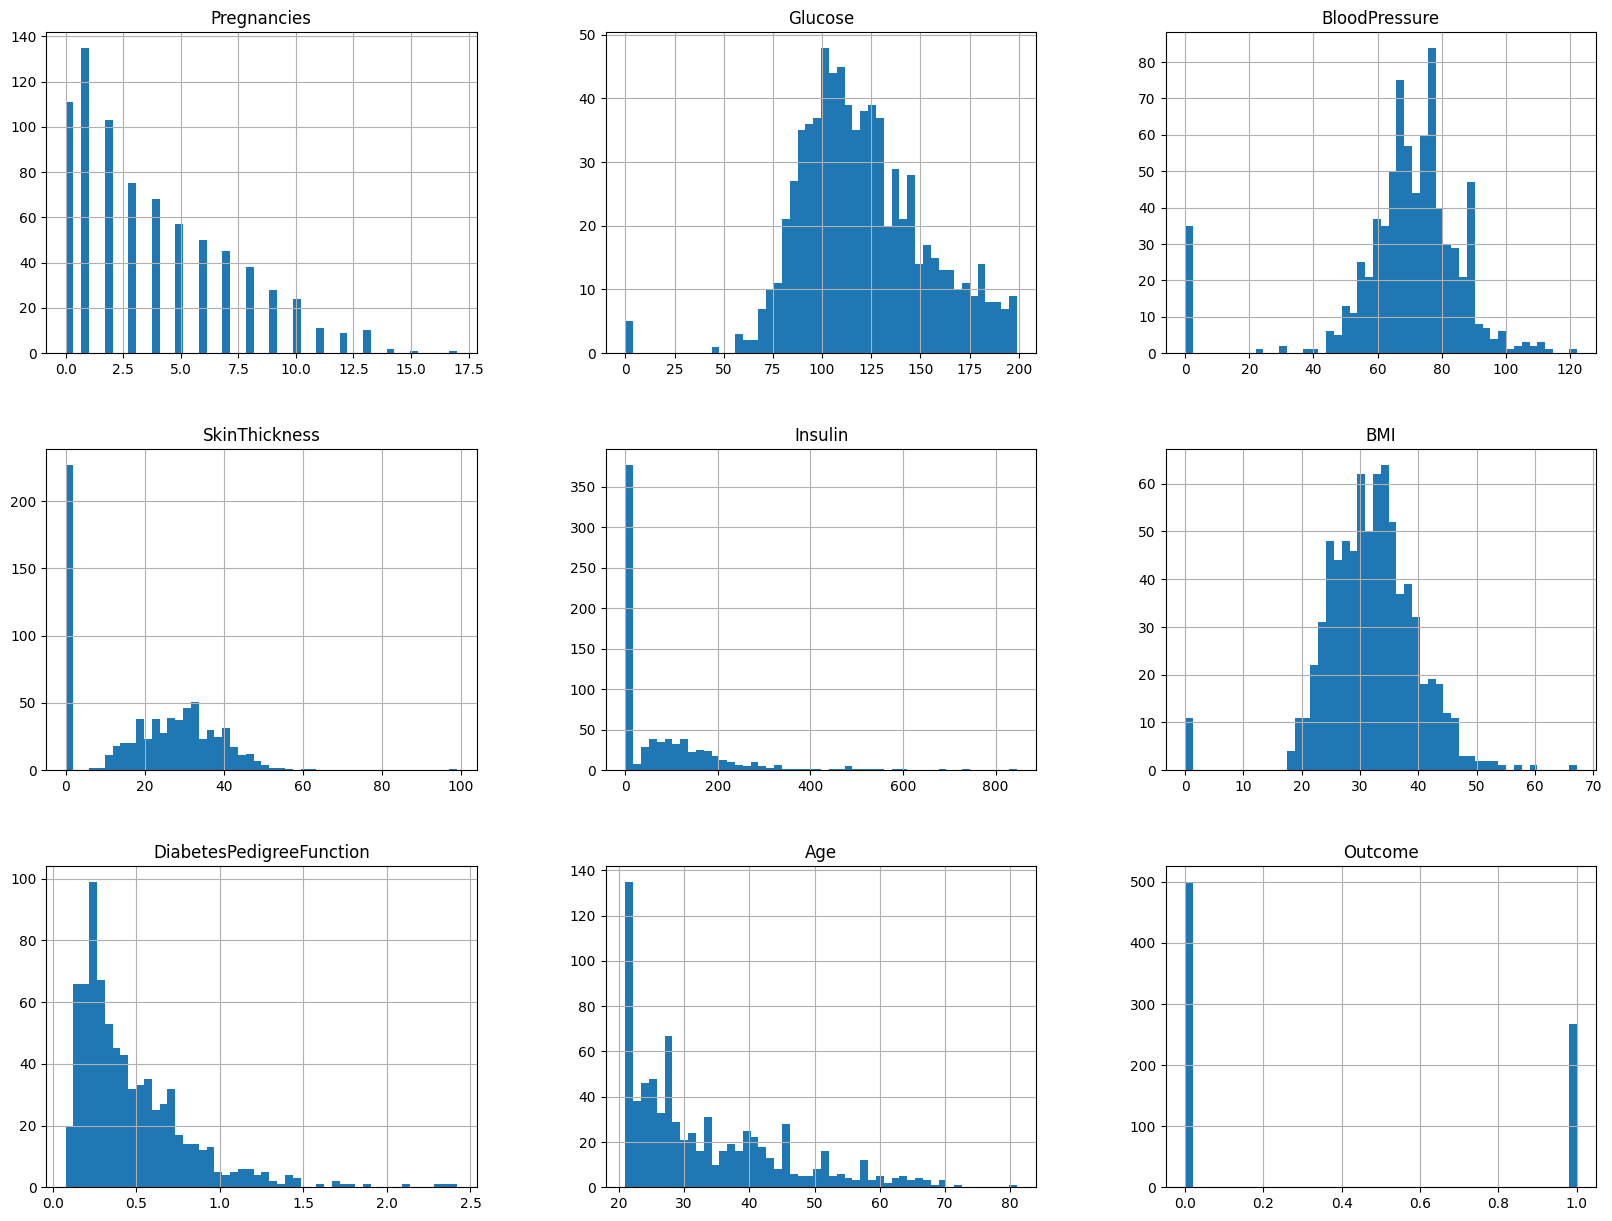

In [9]:
# histogram for each numerical attribute
#%matplotlib inline         # for jupyter notebooks
pima.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

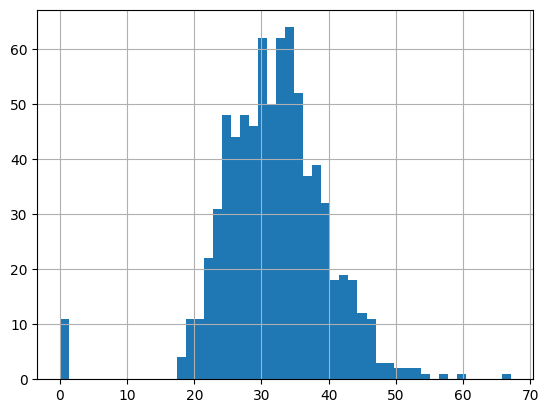

In [10]:
# Basic data cleaning and preparation
# Some features seem to be well distributed; others have values that call our attention
pima["BMI"].hist(bins = 50)

In [11]:
# how many cases have zero value
sum(pima["BMI"] == 0)
sum(pima.BMI == 0)

11

In [12]:
# Select the cases where the BMI values are zero
pima[(pima.BMI==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [13]:
# lets make an imputation of these values based on the mean value
# of the BMI entries that are different from zero
pima[(pima.BMI!=0)]["BMI"].mean()

np.float64(32.457463672391015)

In [14]:
# now select the entries in the table by first selecting the rows with 
# criteria BMI == 0 and then the column BMI
pima.loc[pima.BMI==0,"BMI"] = pima[(pima.BMI!=0)]["BMI"].mean()

In [15]:
# apply the same procedure for the other variables
pima.loc[pima.BloodPressure==0,"BloodPressure"] = pima[(pima.BloodPressure!=0)]["BloodPressure"].mean()
pima.loc[pima.Glucose==0,"Glucose"] = pima[(pima.Glucose!=0)]["Glucose"].mean()
pima.loc[pima.Insulin==0,"Insulin"] = pima[(pima.Insulin!=0)]["Insulin"].mean()
pima.loc[pima.SkinThickness==0,"SkinThickness"] = pima[(pima.SkinThickness!=0)]["SkinThickness"].mean()

/tmp/ipykernel_5279/556439192.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.40518417462484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pima.loc[pima.BloodPressure==0,"BloodPressure"] = pima[(pima.BloodPressure!=0)]["BloodPressure"].mean()
/tmp/ipykernel_5279/556439192.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.6867627785059' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pima.loc[pima.Glucose==0,"Glucose"] = pima[(pima.Glucose!=0)]["Glucose"].mean()
/tmp/ipykernel_5279/556439192.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '155.5482233502538' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

In [24]:

# pima.iloc[pos] does selection by position
# pima.iloc[0,:] first row
# pima.iloc[0,0]
# pima.loc[idx] does selection by index

In [16]:
# Select all cases where Glucose is higher than 100
pima.loc[pima.Glucose>100,:]
pima.loc[pima.Glucose>100,:].shape

(559, 9)

<Axes: xlabel='Age', ylabel='Insulin'>

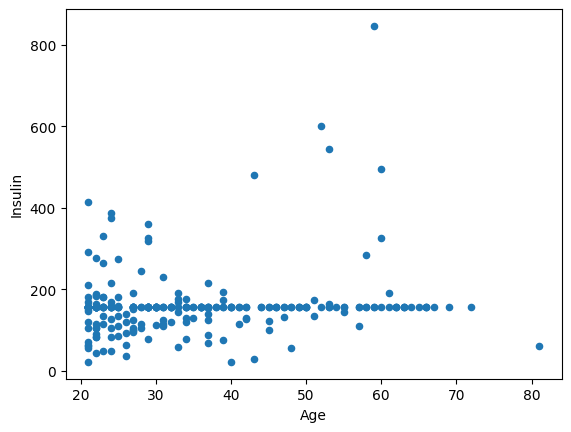

In [17]:
# Select outcomes for cases where Glucose is higher than 100 and BMI less than average
pima.loc[(pima.Glucose>100) & (pima.BMI < pima.BMI.mean()),"Outcome"].value_counts()
# select cases and make scatter plot
pima.loc[(pima.Glucose>100) & (pima.BMI < pima.BMI.mean()),["Age","Insulin"]].plot.scatter(x = "Age", y="Insulin")

In [18]:
# Look for correlations between the variables
pima.corr()
# sort correlation values by BMI
pima.corr()["BMI"].sort_values(ascending=False)
pima.corr()["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

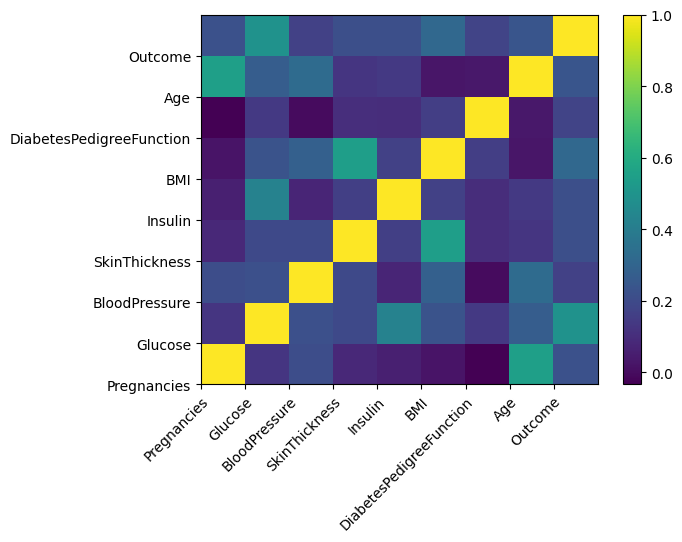

In [19]:
#visualize correlations using heatmap
fig, ax = plt.subplots()
heatmap = plt.pcolor(pima.corr())
cbar = plt.colorbar(heatmap)
# We want to show all labels
ax.set_xticks(np.arange(len(pima.columns)))
ax.set_yticks(np.arange(len(pima.columns)))
ax.set_xticklabels(pima.columns)
ax.set_yticklabels(pima.columns)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()

array([[<Axes: xlabel='BMI', ylabel='BMI'>,
        <Axes: xlabel='Glucose', ylabel='BMI'>,
        <Axes: xlabel='Age', ylabel='BMI'>,
        <Axes: xlabel='Insulin', ylabel='BMI'>],
       [<Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>],
       [<Axes: xlabel='BMI', ylabel='Age'>,
        <Axes: xlabel='Glucose', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Insulin', ylabel='Age'>],
       [<Axes: xlabel='BMI', ylabel='Insulin'>,
        <Axes: xlabel='Glucose', ylabel='Insulin'>,
        <Axes: xlabel='Age', ylabel='Insulin'>,
        <Axes: xlabel='Insulin', ylabel='Insulin'>]], dtype=object)

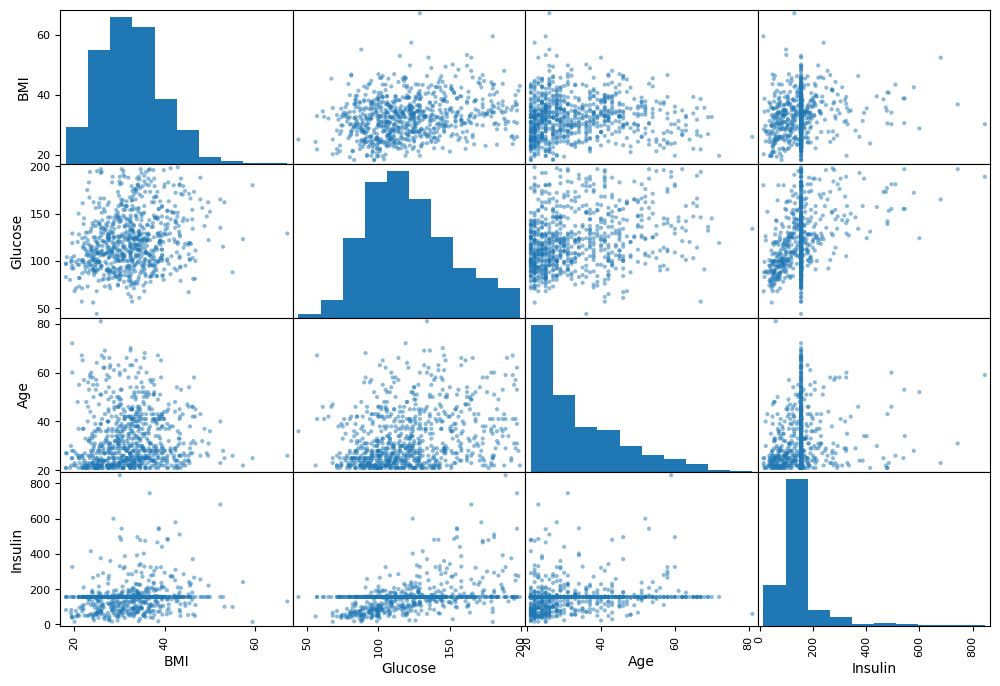

In [20]:
# Plot selected numerical attributed against every other
# use pandas scatter_matrix function
from pandas.plotting import scatter_matrix
attributes = ["BMI", "Glucose","Age","Insulin"]
scatter_matrix(pima[attributes], figsize=(12,8))

<Axes: xlabel='Outcome', ylabel='Glucose'>

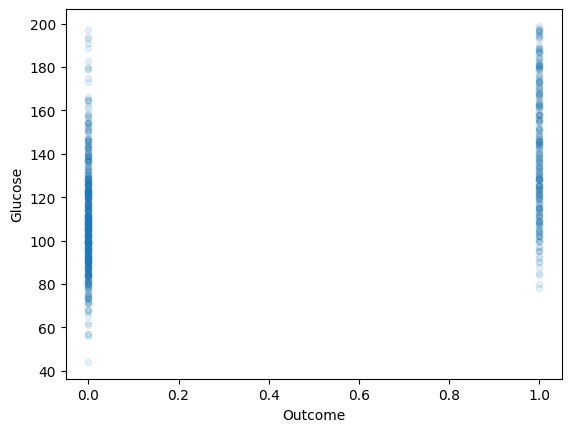

In [21]:
# plot the Outcome w.r.t Glucose
pima.plot(kind ="scatter", x = "Outcome", y = "Glucose", alpha=0.1)

In [22]:
# Include Seaborn for some graphics
sns.set(style = "whitegrid")

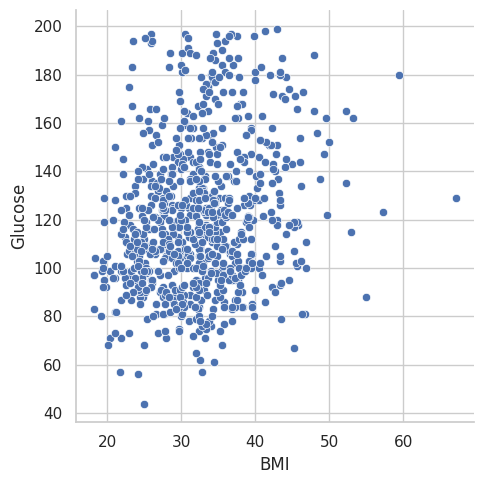

In [23]:
# scatter plot: joint distribution of two variables
sns.relplot(x = "BMI", y = "Glucose", data = pima);


<Axes: xlabel='Outcome', ylabel='count'>

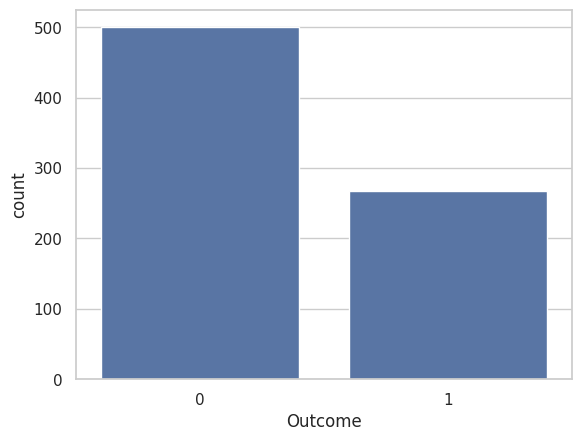

In [24]:
# Create count plot with region on the y-axis
sns.countplot(data = pima, x = "Outcome")


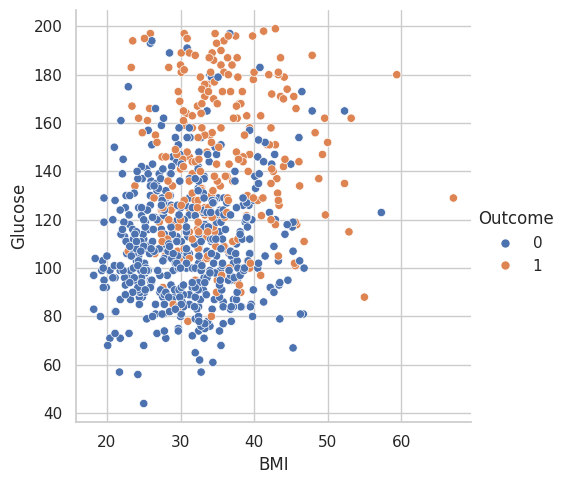

In [26]:
# add information of the outcome on the previous scatter plot
sns.relplot(x = "BMI", y = "Glucose", hue="Outcome" , data = pima)


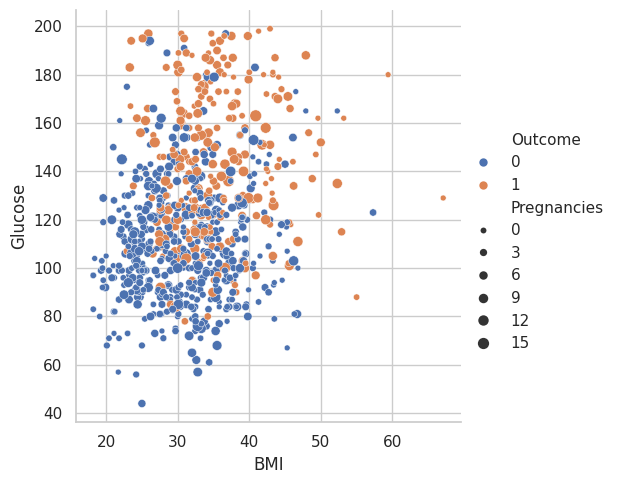

In [27]:
# add semantic variable changes the size of each point according to the number of pregnancies
sns.relplot(x = "BMI", y = "Glucose", hue = "Outcome" , data = pima, size = "Pregnancies")

/tmp/ipykernel_5279/4018651860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="BMI",  x = "Outcome", palette=["m", "g"], data = pima)


<Axes: xlabel='Outcome', ylabel='BMI'>

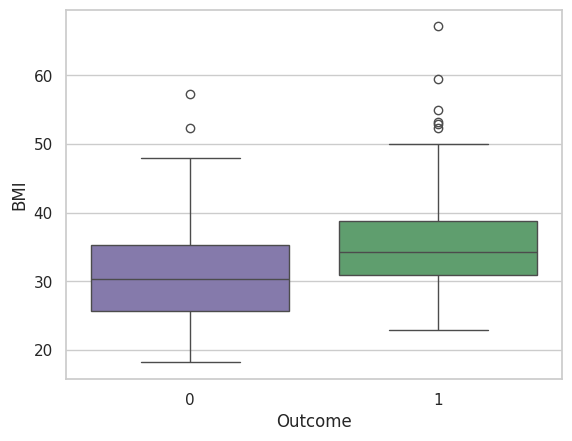

In [28]:
# boxplots of BMI grouped by outcome 
sns.boxplot(y="BMI",  x = "Outcome", palette=["m", "g"], data = pima)

In [29]:
# check the mean values;
print(" BMI for 0 ", pima.loc[pima.Outcome == 0,"BMI"].mean(), " BMI for 1: ", pima.loc[pima.Outcome == 1,"BMI"].mean())


 BMI for 0  30.88843434610304  BMI for 1:  35.38475719158501


AttributeError: PolyCollection.set() got an unexpected keyword argument 'size'

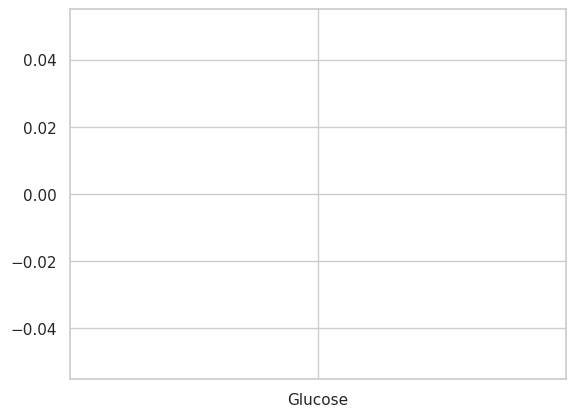

In [31]:
# create a violiplot instead of boxplot
sns.violinplot(data=pima[["Glucose","Insulin"]], inner="points", size=(14,8))


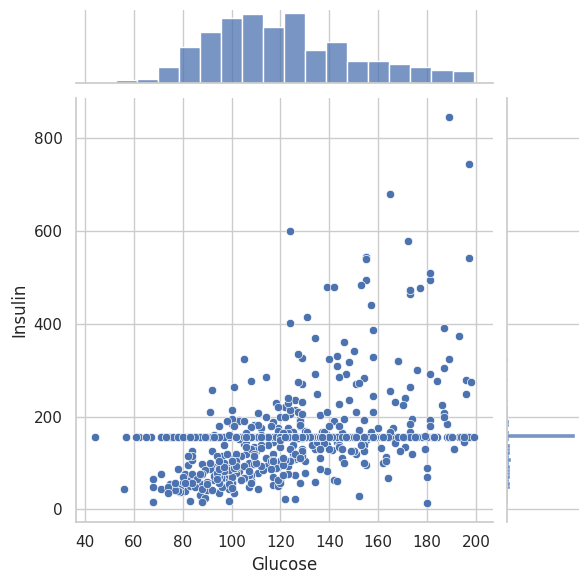

In [32]:
# jointplots are also useful for better understanding point density
sns.jointplot(x = "Glucose", y = "Insulin", data = pima, color="b")

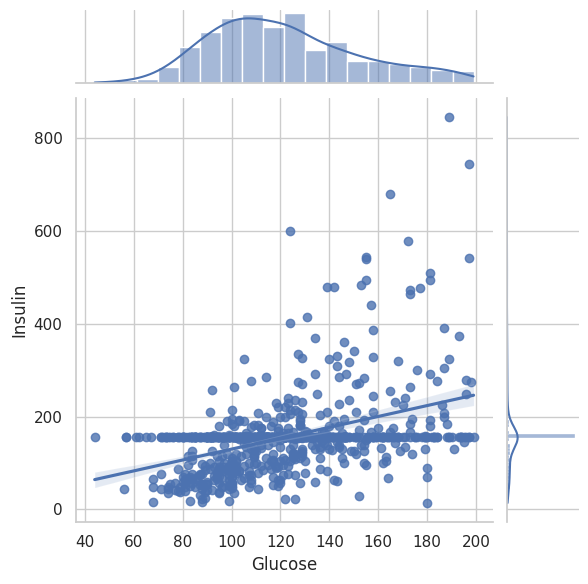

In [33]:
sns.jointplot(x = "Glucose", y = "Insulin", data = pima, color="b", kind = "reg")

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# create a train/test dataset
SEED = 123
test_size = 0.3
X = pima.iloc[:,0:7] # inputs
Y = pima.iloc[:,8]  # output

In [36]:
X.shape

(768, 7)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state = SEED)


In [38]:
X_train.shape

(537, 7)

In [39]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
429,1,95.0,82.0,25.00000,180.000000,35.0,0.233
524,3,125.0,58.0,29.15342,155.548223,31.6,0.151
212,7,179.0,95.0,31.00000,155.548223,34.2,0.164
558,11,103.0,68.0,40.00000,155.548223,46.2,0.126
66,0,109.0,88.0,30.00000,155.548223,32.5,0.855
...,...,...,...,...,...,...,...
98,6,93.0,50.0,30.00000,64.000000,28.7,0.356
322,0,124.0,70.0,20.00000,155.548223,27.4,0.254
382,1,109.0,60.0,8.00000,182.000000,25.4,0.947
365,5,99.0,54.0,28.00000,83.000000,34.0,0.499


In [40]:
500/(500+268)

0.6510416666666666

In [41]:
# test the proportion of each Outcome class in the datasets
y_train.value_counts() / len(y_train) * 100

Outcome
0    66.480447
1    33.519553
Name: count, dtype: float64

In [42]:
y_test.value_counts() / len(y_test) * 100

Outcome
0    61.904762
1    38.095238
Name: count, dtype: float64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state = SEED, stratify=Y)


In [44]:
y_train.value_counts() / len(y_train) * 100

Outcome
0    65.176909
1    34.823091
Name: count, dtype: float64

In [45]:
y_test.value_counts() / len(y_test) * 100

Outcome
0    64.935065
1    35.064935
Name: count, dtype: float64

In [46]:
# 1) You got the data and explored it
# 2) Clean the data (basic pre-processing)
# 3) create a train and test dataset
# Now select and train a ML model
# Two models: Instance-based: KNN and Model-based Logistic Regression

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier

In [47]:
# create and train a LR model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/barbara/MDS/IDS/ICD/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
help(LogisticRegression())


Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [49]:
# prediction probability for each class
log_reg.predict_proba(X_train)

array([[0.25559389, 0.74440611],
       [0.83515587, 0.16484413],
       [0.29364058, 0.70635942],
       ...,
       [0.92942815, 0.07057185],
       [0.64569991, 0.35430009],
       [0.42233021, 0.57766979]])

In [50]:
res = log_reg.predict_proba(X_train)

In [51]:
res.shape


(537, 2)

In [52]:
X_train.shape

(537, 7)

In [53]:
log_reg_preds_train = log_reg.predict(X_train)

In [54]:
log_reg_preds_train


array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,

In [55]:
# calculate the percentage of cases correctly classified
log_reg_acc_train = sum(log_reg_preds_train == y_train)/ len(y_train)

In [56]:
log_reg_acc_train

0.7895716945996276

In [57]:
# prediction of the test set
log_reg_preds_test = log_reg.predict(X_test)
# calculate the percentage of cases correctly classified
log_reg_acc_test = sum(log_reg_preds_test == y_test)/ len(y_test)

In [58]:
log_reg_acc_test

0.7402597402597403

In [61]:
# create and train a KNN model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
# prediction of the training set
knn_preds_train = knn.predict(X_train)

In [63]:
# calculate the percentage of cases correctly classified
knn_acc_train = sum(knn_preds_train == y_train)/ len(y_train)

In [64]:
knn_preds_train == y_train

323    False
448     True
84      True
529     True
329     True
       ...  
327    False
57      True
112     True
751     True
213     True
Name: Outcome, Length: 537, dtype: bool

In [65]:
knn_acc_train

0.839851024208566

In [66]:
# prediction of the test set
knn_preds_test = knn.predict(X_test)
# calculate the percentage of cases correctly classified
knn_acc_test = sum(knn_preds_test == y_test)/ len(y_test)

In [67]:
print ("Logistic Regression Train Accuracy: %.3f" % log_reg_acc_train)
print ("Logistic Regression Test Accuracy: %.3f" % log_reg_acc_test)
print ("KNN Train Accuracy: %.3f" % knn_acc_train)
print ("KNN Test Accuracy: %.3f" % knn_acc_test)


Logistic Regression Train Accuracy: 0.790
Logistic Regression Test Accuracy: 0.740
KNN Train Accuracy: 0.840
KNN Test Accuracy: 0.688


In [68]:
# using cross validation
from sklearn.model_selection import cross_val_score
log_reg_scores = cross_val_score(log_reg, X, Y, scoring="accuracy", cv = 10)
knn_scores = cross_val_score(knn, X, Y, scoring="accuracy", cv = 10)


/home/barbara/MDS/IDS/ICD/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/barbara/MDS/IDS/ICD/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [69]:

print ("Logistic Regression Accuracy Avg: %.3f  Std: %.3f" % (log_reg_scores.mean()*100, log_reg_scores.std()*100))
print ("KNN Accuracy Avg: %.3f  Std: %.3f" % (knn_scores.mean()*100, knn_scores.std()*100))


Logistic Regression Accuracy Avg: 76.046  Std: 3.890
KNN Accuracy Avg: 70.702  Std: 4.167


In [70]:
log_reg_scores

array([0.68831169, 0.76623377, 0.77922078, 0.7012987 , 0.75324675,
       0.79220779, 0.77922078, 0.79220779, 0.73684211, 0.81578947])